<a href="https://colab.research.google.com/github/routb68/PRML_Projects/blob/main/kernel_pca_on_X_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
x_train = x_train.reshape(60000, 784) # reshape 60,000 28 x 28 matrices into 60, 000 784-length vectors.
x_test = x_test.reshape(10000, 784) # reshape 10,000 28 x 28 matrices into 10, 000 784-length vectors.
print("x_train matrix shape", x_train.shape)
print("x_test matrix shape", x_test.shape)

x_train matrix shape (60000, 784)
x_test matrix shape (10000, 784)


In [4]:
np_x_train = np.array(x_train)
np_x_test = np.array(x_test)

In [5]:
print("np_x_train shape", np_x_train.shape)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train shape (60000, 784)
np_x_train[0] datatype uint8


In [6]:
np_x_train = np_x_train.astype(np.float64)
np_x_test = np_x_test.astype(np.float64)
print("np_x_train[0] datatype", np_x_train[0].dtype)

np_x_train[0] datatype float64


In [7]:
transposearray=np.transpose(np_x_test)

print(np_x_test.shape)

(10000, 784)


In [8]:
print(transposearray.shape)

(784, 10000)


In [10]:
k=np.matmul(np_x_test,transposearray)

print(k.shape)

(10000, 10000)


In [11]:
for i in range(10000):
    for j in range(10000):
        k[i][j]+=1
for i in range(10000):
    for j in range(10000):
        k[i][j]=k[i][j]*k[i][j]
I=np.identity(10000) 
div=1/10000
divmat=np.full((10000,10000), div)
matminus = np.subtract(I, divmat) 
f=np.matmul(matminus, k)
kernalcent=np.matmul(f, matminus)

In [12]:
print(I.shape)
print(div)
print(divmat.shape)
print(matminus.shape)
print(f.shape)
print(kernalcent.shape)

(10000, 10000)
0.0001
(10000, 10000)
(10000, 10000)
(10000, 10000)
(10000, 10000)


In [13]:
eig_vals, eig_vecs = np.linalg.eig(kernalcent)

In [14]:
print(eig_vals.shape)
for i in range (20):
  print(f"{i+1} th eigen value is - {np.real(eig_vals[i])}")

(10000,)
1 th eigen value is - 2.937058367810468e+16
2 th eigen value is - 1.5878772826169492e+16
3 th eigen value is - 1.456836255270512e+16
4 th eigen value is - 1.2973999479500286e+16
5 th eigen value is - 1.2226869158107738e+16
6 th eigen value is - 9146911596731142.0
7 th eigen value is - 7005641874852081.0
8 th eigen value is - 6677522052940824.0
9 th eigen value is - 5812567974517029.0
10 th eigen value is - 5067498600964869.0
11 th eigen value is - 4648686647219761.0
12 th eigen value is - 4525274083637092.0
13 th eigen value is - 3792124562296917.5
14 th eigen value is - 3552264234891780.5
15 th eigen value is - 3427330216660477.0
16 th eigen value is - 3277769220322855.5
17 th eigen value is - 2991361055725248.0
18 th eigen value is - 2823995380103569.0
19 th eigen value is - 2673482797658115.0
20 th eigen value is - 2572269467535210.0


In [15]:
print(eig_vecs.shape)

(10000, 10000)


In [17]:
variance = 0
for i in range (10000):
  variance = ( variance + eig_vals[i])
print(variance)

3.1194120406633414e+17


In [18]:
var95 = 0
dimension = 0
for i in range (10000):
  var95 = (var95 + np.real(eig_vals[i]))
  if(var95 >= (0.95 * variance)):
    dimension = i
    break;
print(var95)
print(var95/variance)
print(dimension)

2.9635228760874566e+17
0.9500261066688916
1766


In [19]:
a = 0
a = a + np.real(eig_vals[0])
a = a + np.real(eig_vals[1])

print(a)

print(100*(a/variance))

4.524935650427418e+16
14.505732463176594


In [20]:
eig_vecs = eig_vecs.transpose()
eigenval1=eig_vals[0]
eigenval2=eig_vals[1]
eigenvec1=eig_vecs[0]
eigenvec2=eig_vecs[1]

In [21]:
import math 
e1=math.sqrt(eigenval1)
e2=math.sqrt(eigenval2)
alpha1=np.divide(eigenvec1, e1)
alpha2=np.divide(eigenvec2, e2)

In [22]:
c1=np.matmul(kernalcent, alpha1)
c2=np.matmul(kernalcent, alpha2)

In [26]:
print(c1.shape)
print(c2.shape)

(10000,)
(10000,)


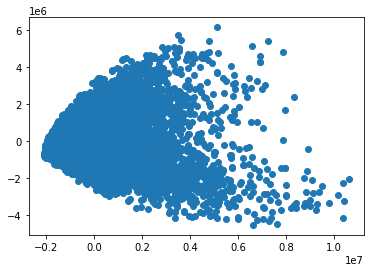

In [23]:
plt.scatter(c1,c2)